In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import bitstring
import matplotlib as mpl

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Bitstream Vera Sans",
 #   "font.weight": "bold"
#    "font.sans-serif": "Helvetica",
})

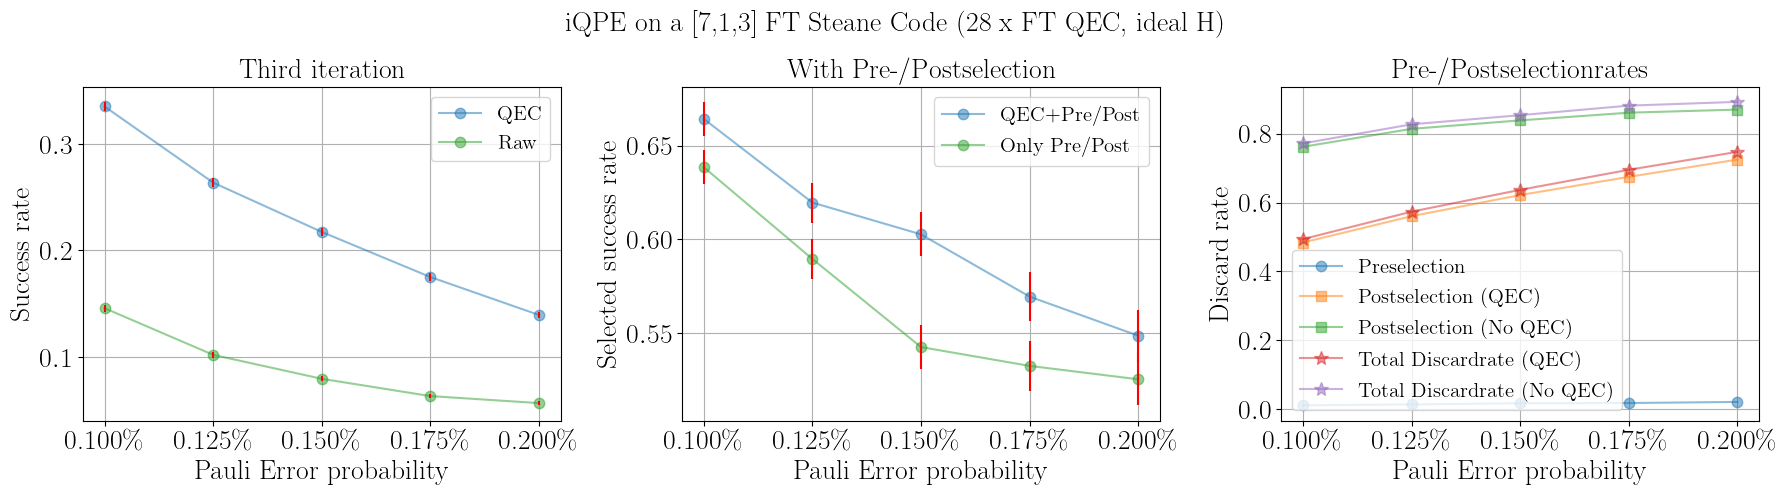

In [16]:
x,pre,post,zero,one,pre_QEC,post_QEC, zero_QEC, one_QEC = np.loadtxt("text/FTSteane_3rd_j.txt", delimiter = ",")   #das selbe wie i+, aber mit 12k shots anstatt nur 2k

fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))

y = []
y_no_QEC = []
for i in range(len(x)):
    y.append(zero_QEC[i])
    y_no_QEC.append(zero[i])

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    if (one[i]+zero[i]) == 0:
        y_no_QEC_PS.append(0.5)
    else:
        y_no_QEC_PS.append(zero[i]/(one[i]+zero[i]))
    if (one_QEC[i]+zero_QEC[i]) == 0:
        y_PS.append(0.5)
    else:
        y_PS.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]))

y_pre = []
for i in range(len(x)):
    y_pre.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]+post_QEC[i]))

err1 = [np.sqrt((i-i**2)/12000) for i in y]
err2 = [np.sqrt((i-i**2)/12000) for i in y_no_QEC]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(12000*(1-post[y_PS.index(i)]-pre_QEC[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(12000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))

ax1.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
ax1.errorbar(x, y, yerr=err1, ecolor="red", linestyle="")

ax1.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
ax1.errorbar(x, y_no_QEC, yerr=err2, ecolor="red", linestyle="")


ax2.plot(x,y_PS, label="QEC+Pre/Post", marker = ".",markersize = 15,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")

ax2.plot(x,y_no_QEC_PS, label="Only Pre/Post", marker = ".",markersize = 15, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")


# ax3.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_pre, label="QEC+Pre", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_PS, label="QEC+Pre+Post", marker = ".",markersize = 15, alpha = 0.5)

ax4.plot(x, pre_QEC, label="Preselection", marker = ".",markersize = 15, alpha = 0.5)
#ax4.plot(x, pre, label="Preselection (No QEC)", marker = ".",markersize = 15, alpha = 0.5)

ax4.plot(x, post_QEC, label="Postselection (QEC)", marker = "s",markersize = 7, alpha = 0.5)
ax4.plot(x, post, label="Postselection (No QEC)", marker = "s",markersize = 7, alpha = 0.5)

ax4.plot(x, post_QEC+pre, label="Total Discardrate (QEC)", marker = "*",markersize = 10, alpha = 0.5)
ax4.plot(x, post+pre, label="Total Discardrate (No QEC)", marker = "*",markersize = 10, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("Third iteration", fontsize=20)
ax2.set_title("With Pre-/Postselection", fontsize=20)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Pre-/Postselectionrates", fontsize=20)
ax1.set_xlabel("Pauli Error probability", fontsize=20)
ax2.set_xlabel("Pauli Error probability", fontsize=20)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=20)
ax1.set_ylabel("Success rate", fontsize=20)
ax2.set_ylabel("Selected success rate", fontsize=20)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=20)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=15)
ax2.legend(fontsize=15)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=15)
fig.suptitle('iQPE on a [7,1,3] FT Steane Code (28 x FT QEC, ideal H)', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/FTSteane14.png", dpi = 200)
plt.show()

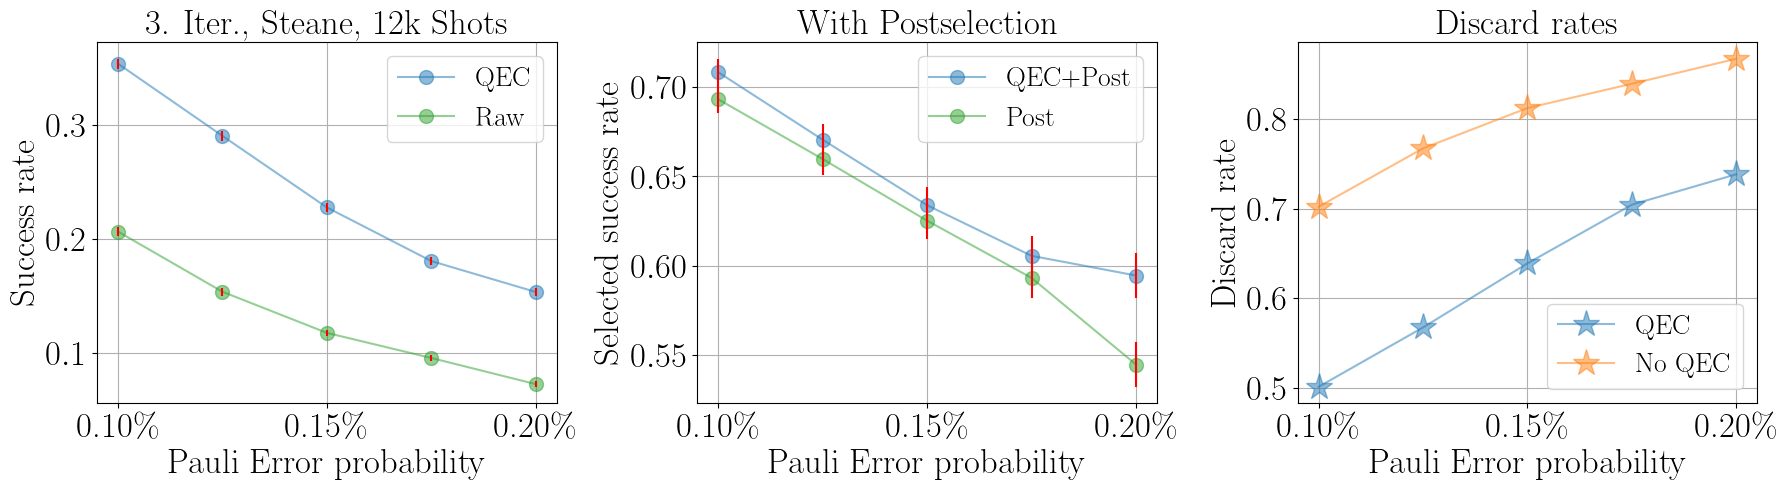

In [17]:
x,pre,post,zero,one,pre_QEC,post_QEC, zero_QEC, one_QEC = np.loadtxt("text/FTSteane_3rd_k.txt", delimiter = ",")   #das selbe wie j, aber mit neuem S_L
fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))

y = []
y_no_QEC = []
for i in range(len(x)):
    y.append(zero_QEC[i])
    y_no_QEC.append(zero[i])

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    if (one[i]+zero[i]) == 0:
        y_no_QEC_PS.append(0.5)
    else:
        y_no_QEC_PS.append(zero[i]/(one[i]+zero[i]))
    if (one_QEC[i]+zero_QEC[i]) == 0:
        y_PS.append(0.5)
    else:
        y_PS.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]))

y_pre = []
for i in range(len(x)):
    y_pre.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]+post_QEC[i]))

err1 = [np.sqrt((i-i**2)/12000) for i in y]
err2 = [np.sqrt((i-i**2)/12000) for i in y_no_QEC]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(12000*(1-post[y_PS.index(i)]-pre_QEC[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(12000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))

ax1.plot(x,y, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err1, ecolor="red", linestyle="")

ax1.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_no_QEC, yerr=err2, ecolor="red", linestyle="")


ax2.plot(x,y_PS, label="QEC+Post", marker = ".",markersize = 20,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")

ax2.plot(x,y_no_QEC_PS, label="Post", marker = ".",markersize = 20, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")


# ax3.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_pre, label="QEC+Pre", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_PS, label="QEC+Pre+Post", marker = ".",markersize = 15, alpha = 0.5)

#ax4.plot(x, pre_QEC, label="Preselection", marker = ".",markersize = 15, alpha = 0.5)
#ax4.plot(x, pre, label="Preselection (No QEC)", marker = ".",markersize = 15, alpha = 0.5)

#ax4.plot(x, post_QEC, label="Postselection (QEC)", marker = "s",markersize = 7, alpha = 0.5)
#ax4.plot(x, post, label="Postselection (No QEC)", marker = "s",markersize = 7, alpha = 0.5)

ax4.plot(x, post_QEC+pre, label="QEC", marker = "*",markersize = 20, alpha = 0.5)
ax4.plot(x, post+pre, label="No QEC", marker = "*",markersize = 20, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("3. Iter., Steane, 12k Shots", fontsize=25)
ax2.set_title("With Postselection", fontsize=25)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Discard rates", fontsize=25)
ax1.set_xlabel("Pauli Error probability", fontsize=25)
ax2.set_xlabel("Pauli Error probability", fontsize=25)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=25)
ax1.set_ylabel("Success rate", fontsize=25)
ax2.set_ylabel("Selected success rate", fontsize=25)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=25)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=20)
#fig.suptitle('iQPE on a [7,1,3] FT Steane Code (28 x FT QEC, ideal H)', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/FTSteane15.png", dpi = 200)
plt.show()

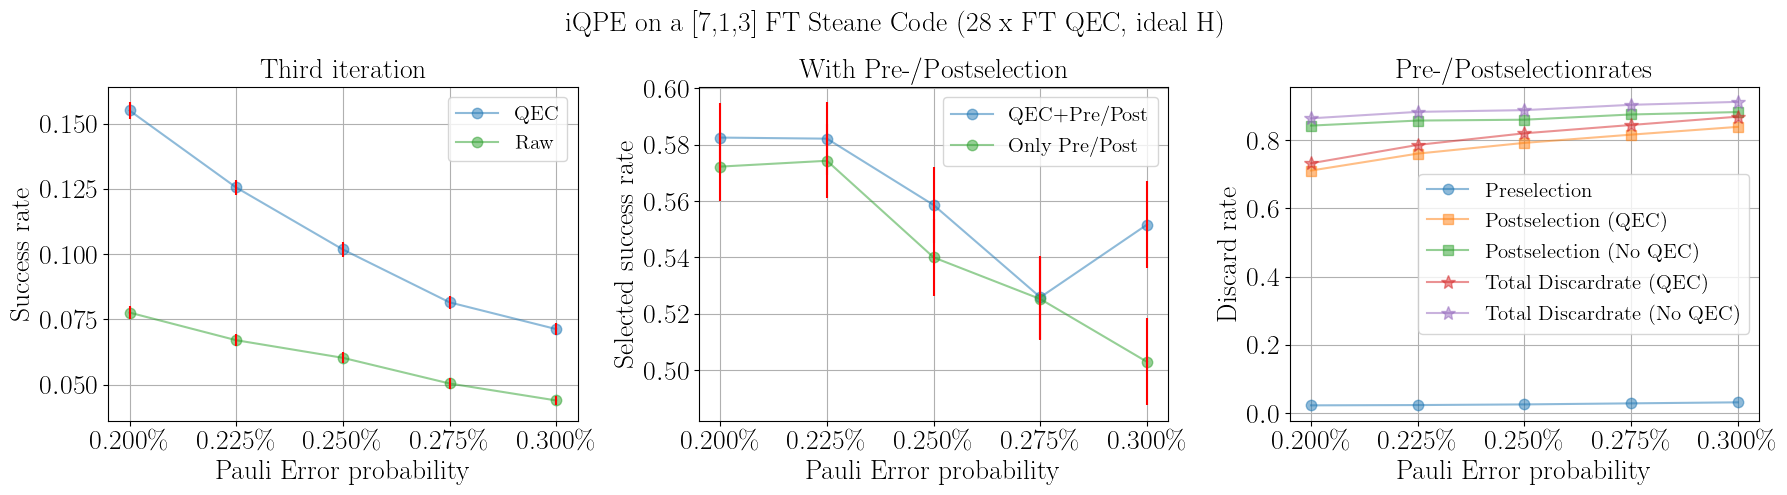

In [18]:
x,pre,post,zero,one,pre_QEC,post_QEC, zero_QEC, one_QEC = np.loadtxt("text/FTSteane_3rd_k+.txt", delimiter = ",")   #das selbe wie j, aber mit neuem S_L
fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))

y = []
y_no_QEC = []
for i in range(len(x)):
    y.append(zero_QEC[i])
    y_no_QEC.append(zero[i])

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    if (one[i]+zero[i]) == 0:
        y_no_QEC_PS.append(0.5)
    else:
        y_no_QEC_PS.append(zero[i]/(one[i]+zero[i]))
    if (one_QEC[i]+zero_QEC[i]) == 0:
        y_PS.append(0.5)
    else:
        y_PS.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]))

y_pre = []
for i in range(len(x)):
    y_pre.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]+post_QEC[i]))

err1 = [np.sqrt((i-i**2)/12000) for i in y]
err2 = [np.sqrt((i-i**2)/12000) for i in y_no_QEC]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(12000*(1-post[y_PS.index(i)]-pre_QEC[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(12000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))

ax1.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
ax1.errorbar(x, y, yerr=err1, ecolor="red", linestyle="")

ax1.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
ax1.errorbar(x, y_no_QEC, yerr=err2, ecolor="red", linestyle="")


ax2.plot(x,y_PS, label="QEC+Pre/Post", marker = ".",markersize = 15,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")

ax2.plot(x,y_no_QEC_PS, label="Only Pre/Post", marker = ".",markersize = 15, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")


# ax3.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_pre, label="QEC+Pre", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_PS, label="QEC+Pre+Post", marker = ".",markersize = 15, alpha = 0.5)

ax4.plot(x, pre_QEC, label="Preselection", marker = ".",markersize = 15, alpha = 0.5)
#ax4.plot(x, pre, label="Preselection (No QEC)", marker = ".",markersize = 15, alpha = 0.5)

ax4.plot(x, post_QEC, label="Postselection (QEC)", marker = "s",markersize = 7, alpha = 0.5)
ax4.plot(x, post, label="Postselection (No QEC)", marker = "s",markersize = 7, alpha = 0.5)

ax4.plot(x, post_QEC+pre, label="Total Discardrate (QEC)", marker = "*",markersize = 10, alpha = 0.5)
ax4.plot(x, post+pre, label="Total Discardrate (No QEC)", marker = "*",markersize = 10, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("Third iteration", fontsize=20)
ax2.set_title("With Pre-/Postselection", fontsize=20)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Pre-/Postselectionrates", fontsize=20)
ax1.set_xlabel("Pauli Error probability", fontsize=20)
ax2.set_xlabel("Pauli Error probability", fontsize=20)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=20)
ax1.set_ylabel("Success rate", fontsize=20)
ax2.set_ylabel("Selected success rate", fontsize=20)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=20)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=15)
ax2.legend(fontsize=15)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=15)
fig.suptitle('iQPE on a [7,1,3] FT Steane Code (28 x FT QEC, ideal H)', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/FTSteane16.png", dpi = 200)
plt.show()

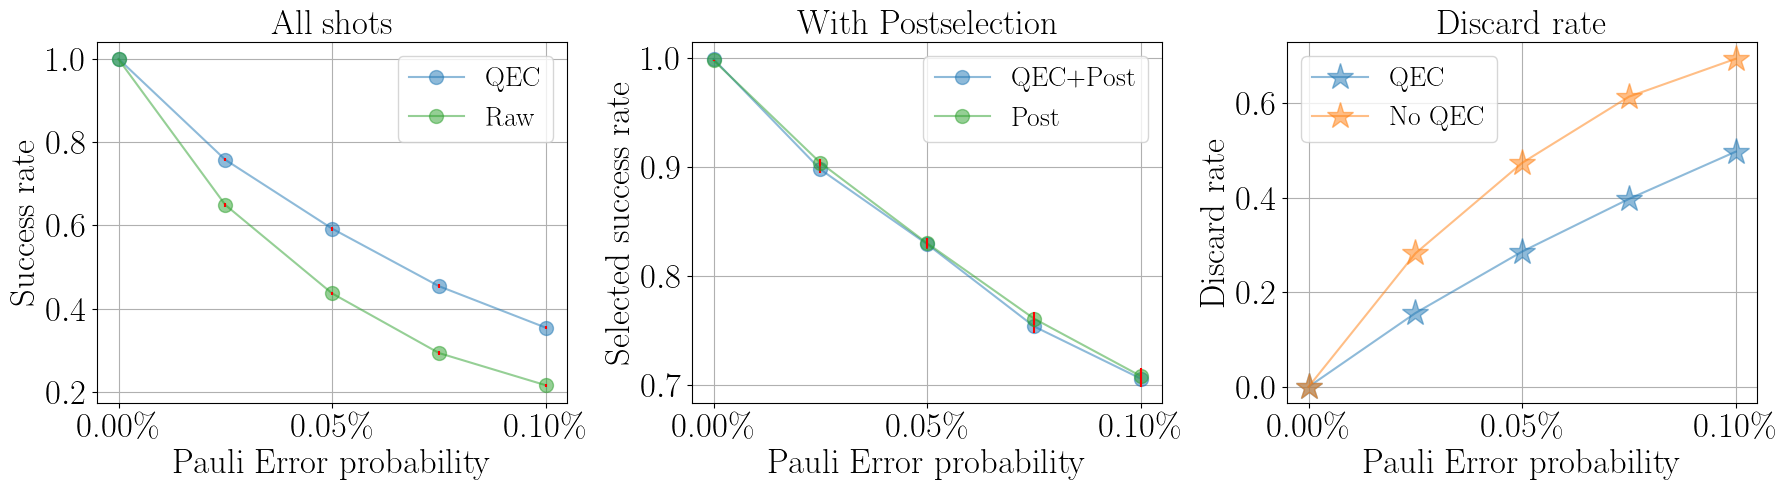

In [19]:
x,pre,post,zero,one,pre_QEC,post_QEC, zero_QEC, one_QEC = np.loadtxt("text/FTSteane_3rd_k++.txt", delimiter = ",")   #das selbe wie j, aber mit neuem S_L
fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))

y = []
y_no_QEC = []
for i in range(len(x)):
    y.append(zero_QEC[i])
    y_no_QEC.append(zero[i])

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    if (one[i]+zero[i]) == 0:
        y_no_QEC_PS.append(0.5)
    else:
        y_no_QEC_PS.append(zero[i]/(one[i]+zero[i]))
    if (one_QEC[i]+zero_QEC[i]) == 0:
        y_PS.append(0.5)
    else:
        y_PS.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]))

y_pre = []
for i in range(len(x)):
    y_pre.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]+post_QEC[i]))

err1 = [np.sqrt((i-i**2)/12000) for i in y]
err2 = [np.sqrt((i-i**2)/12000) for i in y_no_QEC]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(12000*(1-post[y_PS.index(i)]-pre_QEC[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(12000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))

ax1.plot(x,y, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err1, ecolor="red", linestyle="")

ax1.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_no_QEC, yerr=err2, ecolor="red", linestyle="")


ax2.plot(x,y_PS, label="QEC+Post", marker = ".",markersize = 20,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")

ax2.plot(x,y_no_QEC_PS, label="Post", marker = ".",markersize = 20, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")


# ax3.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_pre, label="QEC+Pre", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_PS, label="QEC+Pre+Post", marker = ".",markersize = 15, alpha = 0.5)

#ax4.plot(x, pre_QEC, label="Preselection", marker = ".",markersize = 20, alpha = 0.5)
#ax4.plot(x, pre, label="Preselection (No QEC)", marker = ".",markersize = 15, alpha = 0.5)

#ax4.plot(x, post_QEC, label="Postselection (QEC)", marker = "s",markersize = 7, alpha = 0.5)
#ax4.plot(x, post, label="Postselection (No QEC)", marker = "s",markersize = 7, alpha = 0.5)

ax4.plot(x, post_QEC+pre, label="QEC", marker = "*",markersize = 20, alpha = 0.5)
ax4.plot(x, post+pre, label="No QEC", marker = "*",markersize = 20, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("All shots", fontsize=25)
ax2.set_title("With Postselection", fontsize=25)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Discard rate", fontsize=25)
ax1.set_xlabel("Pauli Error probability", fontsize=25)
ax2.set_xlabel("Pauli Error probability", fontsize=25)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=25)
ax1.set_ylabel("Success rate", fontsize=25)
ax2.set_ylabel("Selected success rate", fontsize=25)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=25)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=20)
#fig.suptitle('iQPE on a [7,1,3] FT Steane Code (28 x FT QEC, ideal H)', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/FTSteane17.png", dpi = 200)
plt.show()

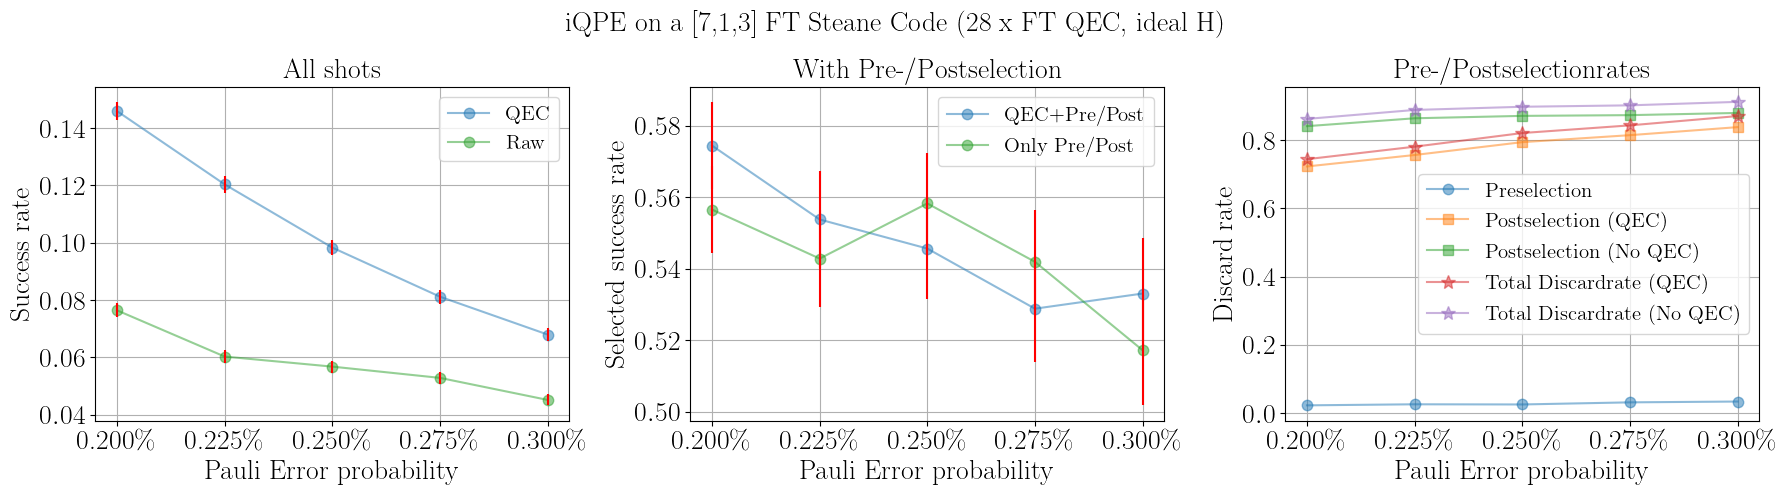

In [20]:
x,pre,post,zero,one,pre_QEC,post_QEC, zero_QEC, one_QEC = np.loadtxt("text/FTSteane_3rd_k+new.txt", delimiter = ",")   #idetnisch wie k+, einfach nochmal laufen lassen lol
fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))

y = []
y_no_QEC = []
for i in range(len(x)):
    y.append(zero_QEC[i])
    y_no_QEC.append(zero[i])

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    if (one[i]+zero[i]) == 0:
        y_no_QEC_PS.append(0.5)
    else:
        y_no_QEC_PS.append(zero[i]/(one[i]+zero[i]))
    if (one_QEC[i]+zero_QEC[i]) == 0:
        y_PS.append(0.5)
    else:
        y_PS.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]))

y_pre = []
for i in range(len(x)):
    y_pre.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]+post_QEC[i]))

err1 = [np.sqrt((i-i**2)/12000) for i in y]
err2 = [np.sqrt((i-i**2)/12000) for i in y_no_QEC]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(12000*(1-post[y_PS.index(i)]-pre_QEC[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(12000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))

ax1.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
ax1.errorbar(x, y, yerr=err1, ecolor="red", linestyle="")

ax1.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
ax1.errorbar(x, y_no_QEC, yerr=err2, ecolor="red", linestyle="")


ax2.plot(x,y_PS, label="QEC+Pre/Post", marker = ".",markersize = 15,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")

ax2.plot(x,y_no_QEC_PS, label="Only Pre/Post", marker = ".",markersize = 15, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")


# ax3.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_pre, label="QEC+Pre", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_PS, label="QEC+Pre+Post", marker = ".",markersize = 15, alpha = 0.5)

ax4.plot(x, pre_QEC, label="Preselection", marker = ".",markersize = 15, alpha = 0.5)
#ax4.plot(x, pre, label="Preselection (No QEC)", marker = ".",markersize = 15, alpha = 0.5)

ax4.plot(x, post_QEC, label="Postselection (QEC)", marker = "s",markersize = 7, alpha = 0.5)
ax4.plot(x, post, label="Postselection (No QEC)", marker = "s",markersize = 7, alpha = 0.5)

ax4.plot(x, post_QEC+pre, label="Total Discardrate (QEC)", marker = "*",markersize = 10, alpha = 0.5)
ax4.plot(x, post+pre, label="Total Discardrate (No QEC)", marker = "*",markersize = 10, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("All shots", fontsize=20)
ax2.set_title("With Pre-/Postselection", fontsize=20)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Pre-/Postselectionrates", fontsize=20)
ax1.set_xlabel("Pauli Error probability", fontsize=20)
ax2.set_xlabel("Pauli Error probability", fontsize=20)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=20)
ax1.set_ylabel("Success rate", fontsize=20)
ax2.set_ylabel("Selected success rate", fontsize=20)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=20)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=15)
ax2.legend(fontsize=15)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=15)
fig.suptitle('iQPE on a [7,1,3] FT Steane Code (28 x FT QEC, ideal H)', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/FTSteane18.png", dpi = 200)
plt.show()

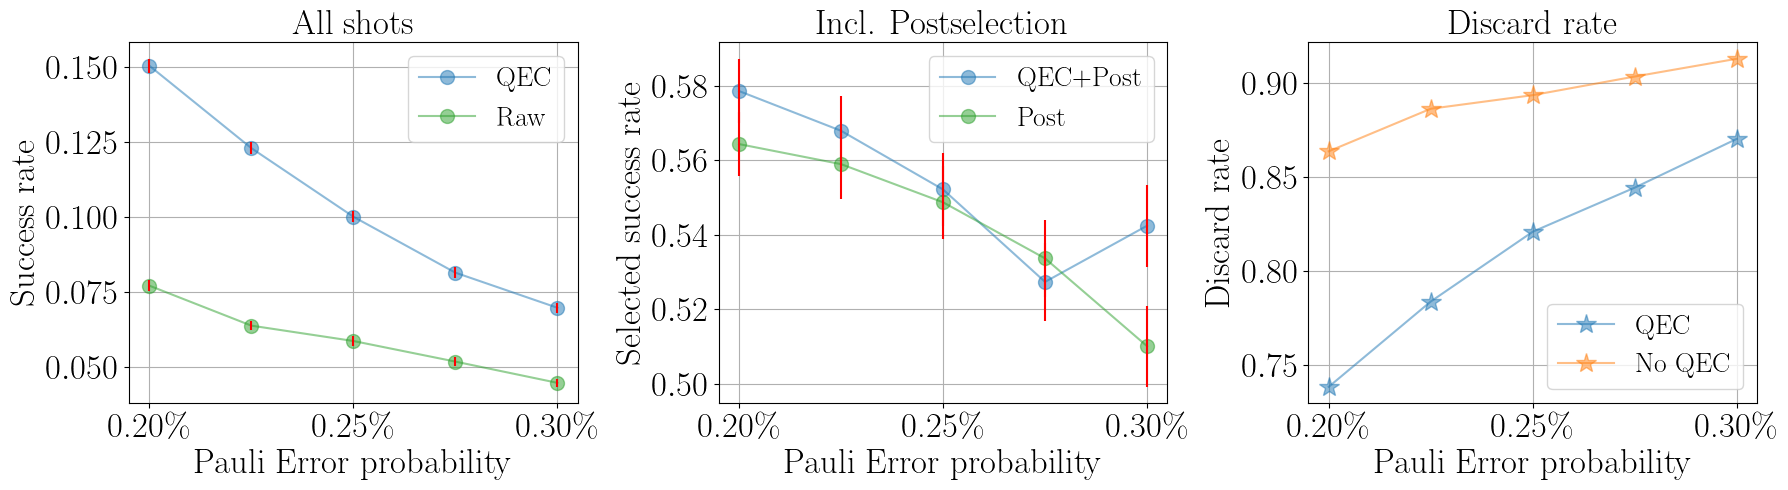

In [21]:
x,pre1,post1,zero1,one1,pre_QEC1,post_QEC1, zero_QEC1, one_QEC1 = np.loadtxt("text/FTSteane_3rd_k+new.txt", delimiter = ",")   #k+und k+new zusammen nehmen, um fehler zu verringern
x,pre2,post2,zero2,one2,pre_QEC2,post_QEC2, zero_QEC2, one_QEC2 = np.loadtxt("text/FTSteane_3rd_k+.txt", delimiter = ",")

pre = np.add(pre1, pre2)/2
post = np.add(post1, post2)/2
zero = np.add(zero2, zero1)/2
one = np.add(one2, one1)/2
pre_QEC = np.add(pre_QEC1, pre_QEC2)/2
post_QEC = np.add(post_QEC1, post_QEC2)/2
zero_QEC = np.add(zero_QEC2, zero_QEC1)/2
one_QEC =np.add(one_QEC1, one_QEC2)/2

fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)

ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))

y = []
y_no_QEC = []
for i in range(len(x)):
    y.append(zero_QEC[i])
    y_no_QEC.append(zero[i])

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    if (one[i]+zero[i]) == 0:
        y_no_QEC_PS.append(0.5)
    else:
        y_no_QEC_PS.append(zero[i]/(one[i]+zero[i]))
    if (one_QEC[i]+zero_QEC[i]) == 0:
        y_PS.append(0.5)
    else:
        y_PS.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]))

y_pre = []
for i in range(len(x)):
    y_pre.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]+post_QEC[i]))

err1 = [np.sqrt((i-i**2)/24000) for i in y]
err2 = [np.sqrt((i-i**2)/24000) for i in y_no_QEC]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(24000*(1-post[y_PS.index(i)]-pre_QEC[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(24000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))

ax1.plot(x,y, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err1, ecolor="red", linestyle="")

ax1.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_no_QEC, yerr=err2, ecolor="red", linestyle="")


ax2.plot(x,y_PS, label="QEC+Post", marker = ".",markersize = 20,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")

ax2.plot(x,y_no_QEC_PS, label="Post", marker = ".",markersize = 20, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")


# ax3.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_pre, label="QEC+Pre", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_PS, label="QEC+Pre+Post", marker = ".",markersize = 15, alpha = 0.5)

#ax4.plot(x, pre_QEC, label="Preselection", marker = ".",markersize = 15, alpha = 0.5)
#ax4.plot(x, pre, label="Preselection (No QEC)", marker = ".",markersize = 15, alpha = 0.5)

#ax4.plot(x, post_QEC, label="Postselection (QEC)", marker = "s",markersize = 7, alpha = 0.5)
#ax4.plot(x, post, label="Postselection (No QEC)", marker = "s",markersize = 7, alpha = 0.5)

ax4.plot(x, post_QEC+pre, label="QEC", marker = "*",markersize = 15, alpha = 0.5)
ax4.plot(x, post+pre, label="No QEC", marker = "*",markersize = 15, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("All shots", fontsize=25)
ax2.set_title("Incl. Postselection", fontsize=25)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Discard rate", fontsize=25)
ax1.set_xlabel("Pauli Error probability", fontsize=25)
ax2.set_xlabel("Pauli Error probability", fontsize=25)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=25)
ax1.set_ylabel("Success rate", fontsize=25)
ax2.set_ylabel("Selected success rate", fontsize=25)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=25)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=20)
#fig.suptitle('iQPE on a [7,1,3] FT Steane Code (28 x FT QEC, ideal H)', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/FTSteane19.png", dpi = 200)
plt.show()

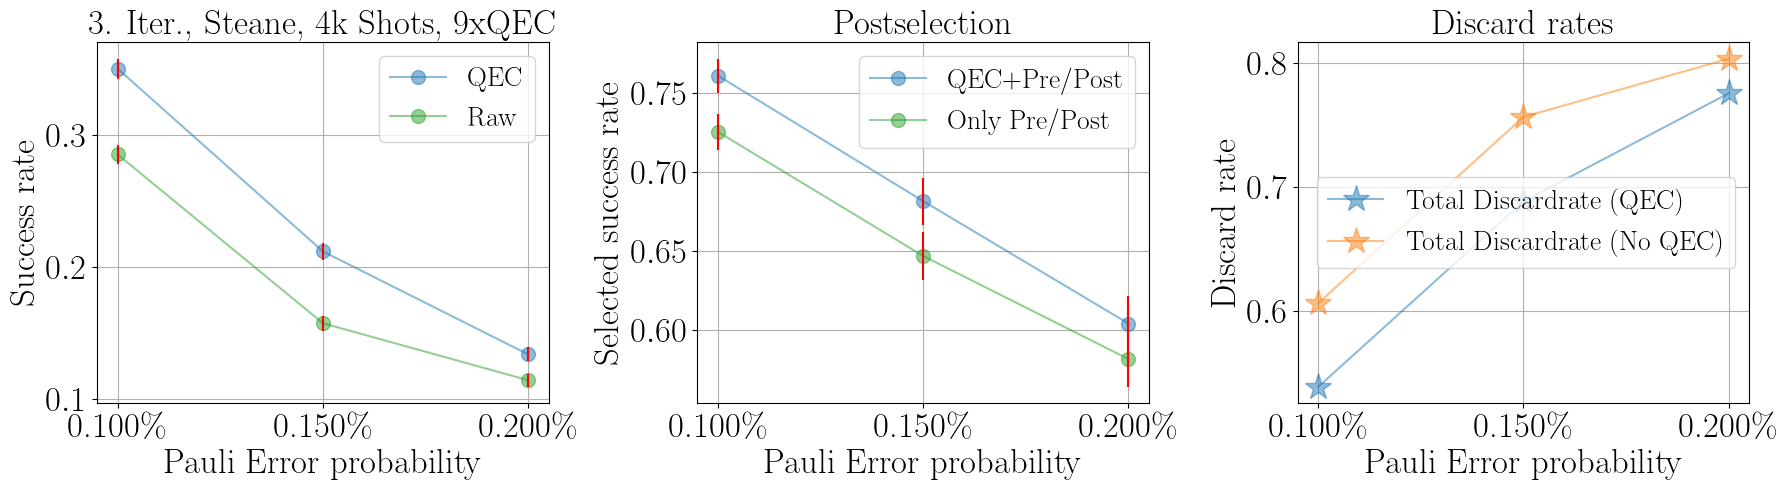

In [22]:
x,pre,post,zero,one,pre_QEC,post_QEC, zero_QEC, one_QEC = np.loadtxt("text/FTSteane_3rd_l.txt", delimiter = ",")   #evry third t/tdg gate with QEC
fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))

y = []
y_no_QEC = []
for i in range(len(x)):
    y.append(zero_QEC[i])
    y_no_QEC.append(zero[i])

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    if (one[i]+zero[i]) == 0:
        y_no_QEC_PS.append(0.5)
    else:
        y_no_QEC_PS.append(zero[i]/(one[i]+zero[i]))
    if (one_QEC[i]+zero_QEC[i]) == 0:
        y_PS.append(0.5)
    else:
        y_PS.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]))

y_pre = []
for i in range(len(x)):
    y_pre.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]+post_QEC[i]))

err1 = [np.sqrt((i-i**2)/4000) for i in y]
err2 = [np.sqrt((i-i**2)/4000) for i in y_no_QEC]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(4000*(1-post[y_PS.index(i)]-pre_QEC[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(4000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))

ax1.plot(x,y, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err1, ecolor="red", linestyle="")

ax1.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_no_QEC, yerr=err2, ecolor="red", linestyle="")


ax2.plot(x,y_PS, label="QEC+Pre/Post", marker = ".",markersize = 20,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")

ax2.plot(x,y_no_QEC_PS, label="Only Pre/Post", marker = ".",markersize = 20, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")


# ax3.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_pre, label="QEC+Pre", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_PS, label="QEC+Pre+Post", marker = ".",markersize = 15, alpha = 0.5)

#ax4.plot(x, pre, label="Preselection (No QEC)", marker = ".",markersize = 15, alpha = 0.5)

# ax4.plot(x, post_QEC, label="Postselection (QEC)", marker = "s",markersize = 7, alpha = 0.5)
# ax4.plot(x, post, label="Postselection (No QEC)", marker = "s",markersize = 7, alpha = 0.5)

ax4.plot(x, post_QEC+pre, label="Total Discardrate (QEC)", marker = "*",markersize = 20, alpha = 0.5)
ax4.plot(x, post+pre, label="Total Discardrate (No QEC)", marker = "*",markersize = 20, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("3. Iter., Steane, 4k Shots, 9xQEC", fontsize=25)
ax2.set_title("Postselection", fontsize=25)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Discard rates", fontsize=25)
ax1.set_xlabel("Pauli Error probability", fontsize=25)
ax2.set_xlabel("Pauli Error probability", fontsize=25)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=25)
ax1.set_ylabel("Success rate", fontsize=25)
ax2.set_ylabel("Selected success rate", fontsize=25)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=25)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=20)
#fig.suptitle('iQPE on a [7,1,3] FT Steane Code (9 x FT QEC, ideal H)', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/FTSteane20.png", dpi = 200)
plt.show()

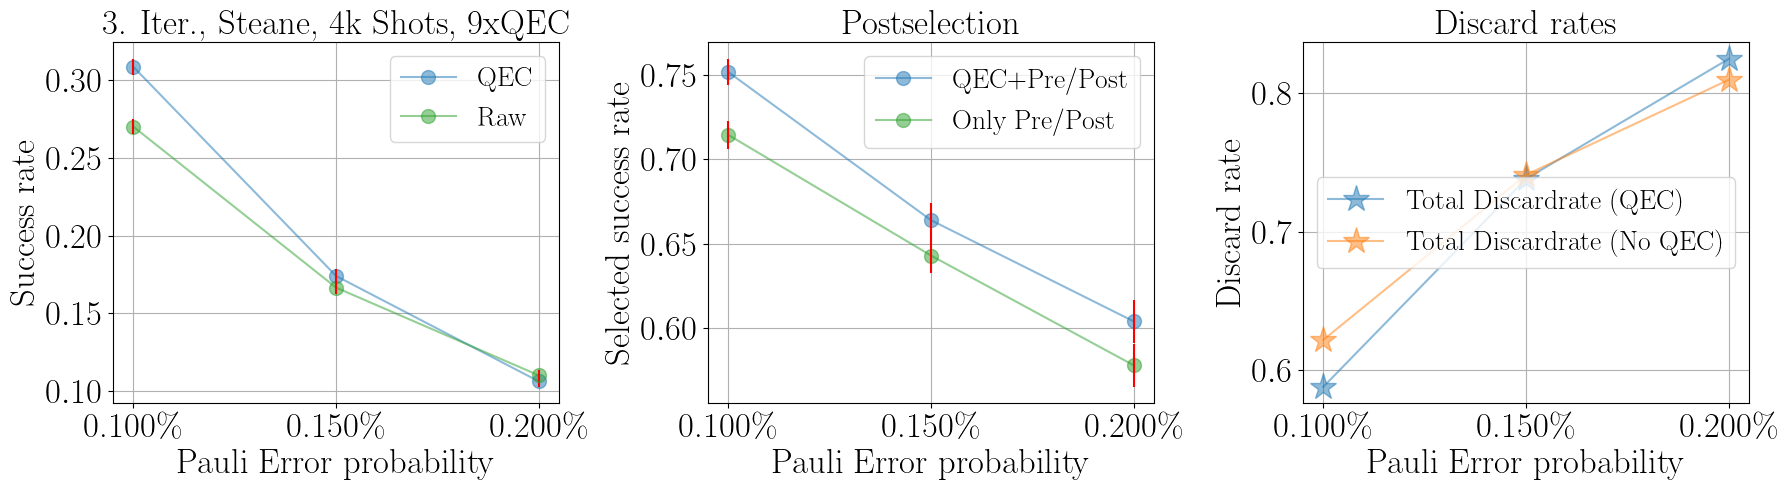

In [ ]:
x,pre,post,zero,one,pre_QEC,post_QEC, zero_QEC, one_QEC = np.loadtxt("text/FTSteane_3rd_m.txt", delimiter = ",")   #evry second t/tdg gate with QEC
fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))

y = []
y_no_QEC = []
for i in range(len(x)):
    y.append(zero_QEC[i])
    y_no_QEC.append(zero[i])

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    if (one[i]+zero[i]) == 0:
        y_no_QEC_PS.append(0.5)
    else:
        y_no_QEC_PS.append(zero[i]/(one[i]+zero[i]))
    if (one_QEC[i]+zero_QEC[i]) == 0:
        y_PS.append(0.5)
    else:
        y_PS.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]))

y_pre = []
for i in range(len(x)):
    y_pre.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]+post_QEC[i]))

err1 = [np.sqrt((i-i**2)/8000) for i in y]
err2 = [np.sqrt((i-i**2)/8000) for i in y_no_QEC]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(8000*(1-post[y_PS.index(i)]-pre_QEC[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(8000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))

ax1.plot(x,y, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err1, ecolor="red", linestyle="")

ax1.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_no_QEC, yerr=err2, ecolor="red", linestyle="")


ax2.plot(x,y_PS, label="QEC+Pre/Post", marker = ".",markersize = 20,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")

ax2.plot(x,y_no_QEC_PS, label="Only Pre/Post", marker = ".",markersize = 20, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")


# ax3.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_pre, label="QEC+Pre", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_PS, label="QEC+Pre+Post", marker = ".",markersize = 15, alpha = 0.5)

#ax4.plot(x, pre, label="Preselection (No QEC)", marker = ".",markersize = 15, alpha = 0.5)

# ax4.plot(x, post_QEC, label="Postselection (QEC)", marker = "s",markersize = 7, alpha = 0.5)
# ax4.plot(x, post, label="Postselection (No QEC)", marker = "s",markersize = 7, alpha = 0.5)

ax4.plot(x, post_QEC+pre, label="Total Discardrate (QEC)", marker = "*",markersize = 20, alpha = 0.5)
ax4.plot(x, post+pre, label="Total Discardrate (No QEC)", marker = "*",markersize = 20, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("3. Iter., Steane, 4k Shots, 9xQEC", fontsize=25)
ax2.set_title("Postselection", fontsize=25)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Discard rates", fontsize=25)
ax1.set_xlabel("Pauli Error probability", fontsize=25)
ax2.set_xlabel("Pauli Error probability", fontsize=25)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=25)
ax1.set_ylabel("Success rate", fontsize=25)
ax2.set_ylabel("Selected success rate", fontsize=25)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=25)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=20)
#fig.suptitle('iQPE on a [7,1,3] FT Steane Code (12 x FT QEC, ideal H)', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/FTSteane21.png", dpi = 200)
plt.show()

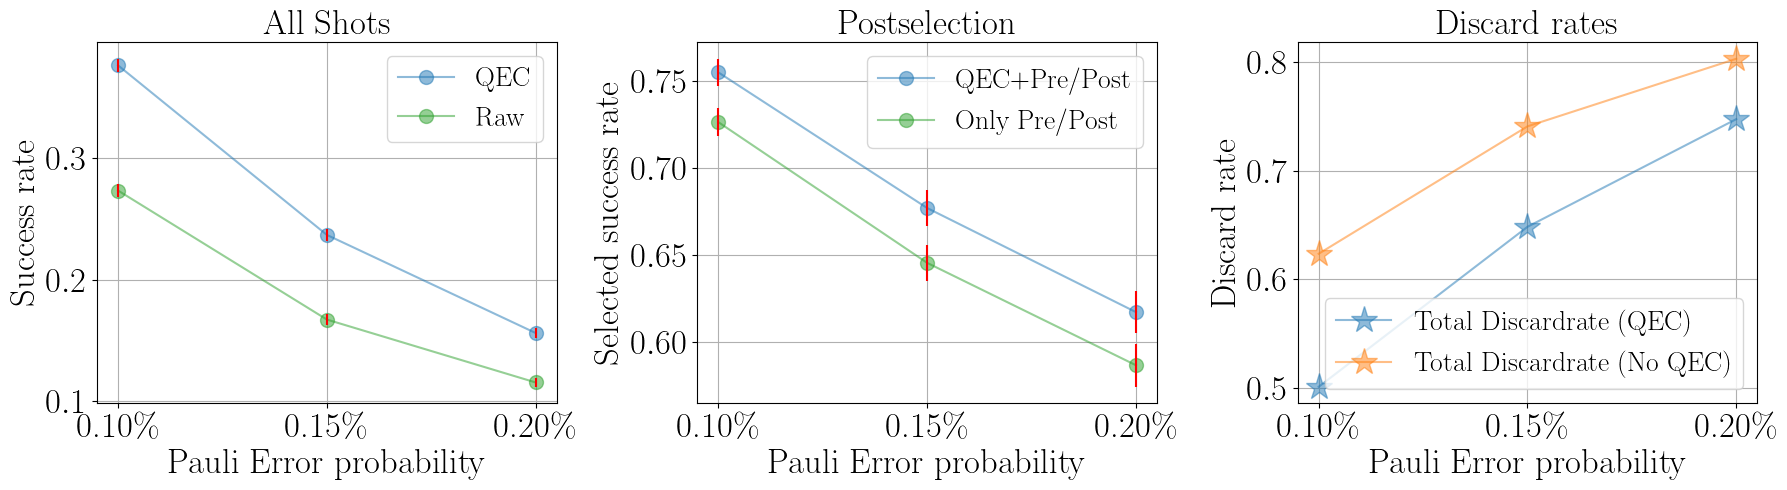

In [10]:
x,pre,post,zero,one,pre_QEC,post_QEC, zero_QEC, one_QEC = np.loadtxt("text/FTSteane_3rd_n.txt", delimiter = ",")   #evry fourth t/tdg gate with QEC
fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))

y = []
y_no_QEC = []
for i in range(len(x)):
    y.append(zero_QEC[i])
    y_no_QEC.append(zero[i])

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    if (one[i]+zero[i]) == 0:
        y_no_QEC_PS.append(0.5)
    else:
        y_no_QEC_PS.append(zero[i]/(one[i]+zero[i]))
    if (one_QEC[i]+zero_QEC[i]) == 0:
        y_PS.append(0.5)
    else:
        y_PS.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]))

y_pre = []
for i in range(len(x)):
    y_pre.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]+post_QEC[i]))

err1 = [np.sqrt((i-i**2)/8000) for i in y]
err2 = [np.sqrt((i-i**2)/8000) for i in y_no_QEC]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(8000*(1-post[y_PS.index(i)]-pre_QEC[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(8000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))

ax1.plot(x,y, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err1, ecolor="red", linestyle="")

ax1.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_no_QEC, yerr=err2, ecolor="red", linestyle="")


ax2.plot(x,y_PS, label="QEC+Pre/Post", marker = ".",markersize = 20,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")

ax2.plot(x,y_no_QEC_PS, label="Only Pre/Post", marker = ".",markersize = 20, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")


# ax3.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_pre, label="QEC+Pre", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_PS, label="QEC+Pre+Post", marker = ".",markersize = 15, alpha = 0.5)

#ax4.plot(x, pre, label="Preselection (No QEC)", marker = ".",markersize = 15, alpha = 0.5)

# ax4.plot(x, post_QEC, label="Postselection (QEC)", marker = "s",markersize = 7, alpha = 0.5)
# ax4.plot(x, post, label="Postselection (No QEC)", marker = "s",markersize = 7, alpha = 0.5)

ax4.plot(x, post_QEC+pre, label="Total Discardrate (QEC)", marker = "*",markersize = 20, alpha = 0.5)
ax4.plot(x, post+pre, label="Total Discardrate (No QEC)", marker = "*",markersize = 20, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("All Shots", fontsize=25) #ax1.set_title("3. Iter., Steane, 8k Shots, 6xQEC", fontsize=25)
ax2.set_title("Postselection", fontsize=25)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Discard rates", fontsize=25)
ax1.set_xlabel("Pauli Error probability", fontsize=25)
ax2.set_xlabel("Pauli Error probability", fontsize=25)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=25)
ax1.set_ylabel("Success rate", fontsize=25)
ax2.set_ylabel("Selected success rate", fontsize=25)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=25)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=20)
#fig.suptitle('iQPE on a [7,1,3] FT Steane Code (6 x FT QEC, ideal H)', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/FTSteane22.png", dpi = 200)
plt.show()

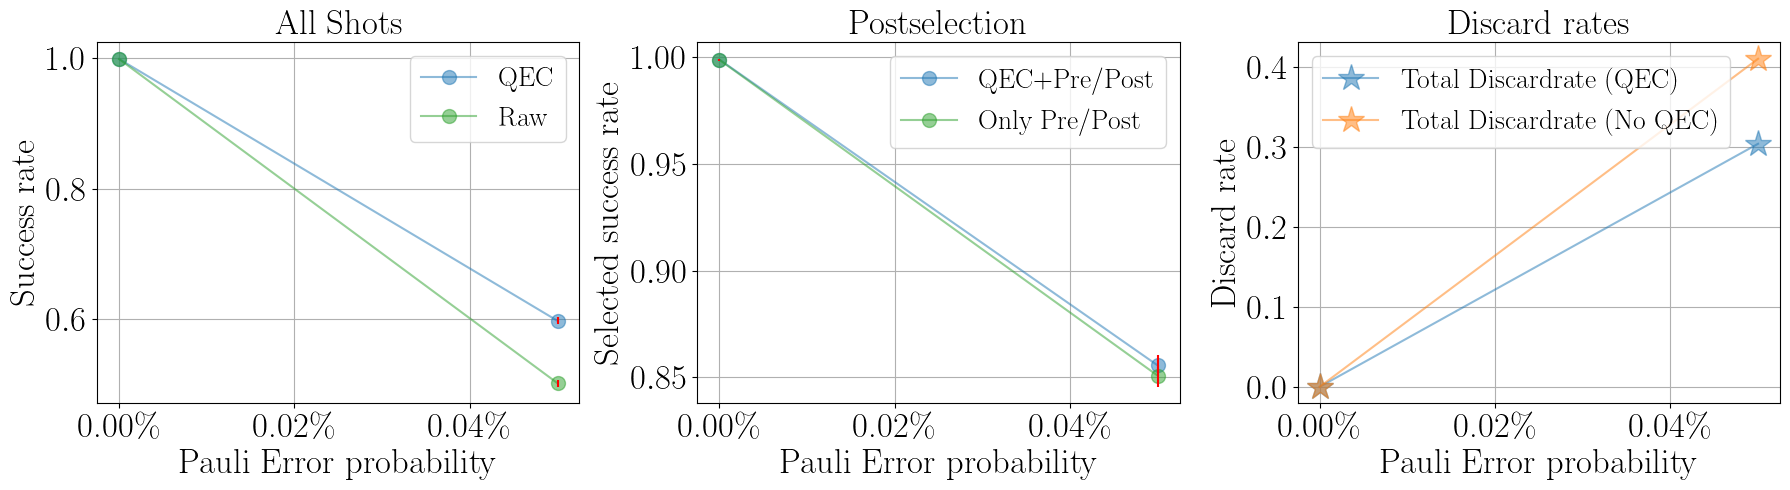

In [24]:
x,pre,post,zero,one,pre_QEC,post_QEC, zero_QEC, one_QEC = np.loadtxt("text/FTSteane_3rd_n+.txt", delimiter = ",")   #evry fourth t/tdg gate with QEC
fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))

y = []
y_no_QEC = []
for i in range(len(x)):
    y.append(zero_QEC[i])
    y_no_QEC.append(zero[i])

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    if (one[i]+zero[i]) == 0:
        y_no_QEC_PS.append(0.5)
    else:
        y_no_QEC_PS.append(zero[i]/(one[i]+zero[i]))
    if (one_QEC[i]+zero_QEC[i]) == 0:
        y_PS.append(0.5)
    else:
        y_PS.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]))

y_pre = []
for i in range(len(x)):
    y_pre.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]+post_QEC[i]))

err1 = [np.sqrt((i-i**2)/8000) for i in y]
err2 = [np.sqrt((i-i**2)/8000) for i in y_no_QEC]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(8000*(1-post[y_PS.index(i)]-pre_QEC[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(8000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))

ax1.plot(x,y, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err1, ecolor="red", linestyle="")

ax1.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_no_QEC, yerr=err2, ecolor="red", linestyle="")


ax2.plot(x,y_PS, label="QEC+Pre/Post", marker = ".",markersize = 20,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")

ax2.plot(x,y_no_QEC_PS, label="Only Pre/Post", marker = ".",markersize = 20, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")


# ax3.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_pre, label="QEC+Pre", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_PS, label="QEC+Pre+Post", marker = ".",markersize = 15, alpha = 0.5)

#ax4.plot(x, pre, label="Preselection (No QEC)", marker = ".",markersize = 15, alpha = 0.5)

# ax4.plot(x, post_QEC, label="Postselection (QEC)", marker = "s",markersize = 7, alpha = 0.5)
# ax4.plot(x, post, label="Postselection (No QEC)", marker = "s",markersize = 7, alpha = 0.5)

ax4.plot(x, post_QEC+pre, label="Total Discardrate (QEC)", marker = "*",markersize = 20, alpha = 0.5)
ax4.plot(x, post+pre, label="Total Discardrate (No QEC)", marker = "*",markersize = 20, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("All Shots", fontsize=25) #ax1.set_title("3. Iter., Steane, 8k Shots, 6xQEC", fontsize=25)
ax2.set_title("Postselection", fontsize=25)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Discard rates", fontsize=25)
ax1.set_xlabel("Pauli Error probability", fontsize=25)
ax2.set_xlabel("Pauli Error probability", fontsize=25)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=25)
ax1.set_ylabel("Success rate", fontsize=25)
ax2.set_ylabel("Selected success rate", fontsize=25)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=25)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=20)
#fig.suptitle('iQPE on a [7,1,3] FT Steane Code (6 x FT QEC, ideal H)', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/FTSteane23.png", dpi = 200)
plt.show()

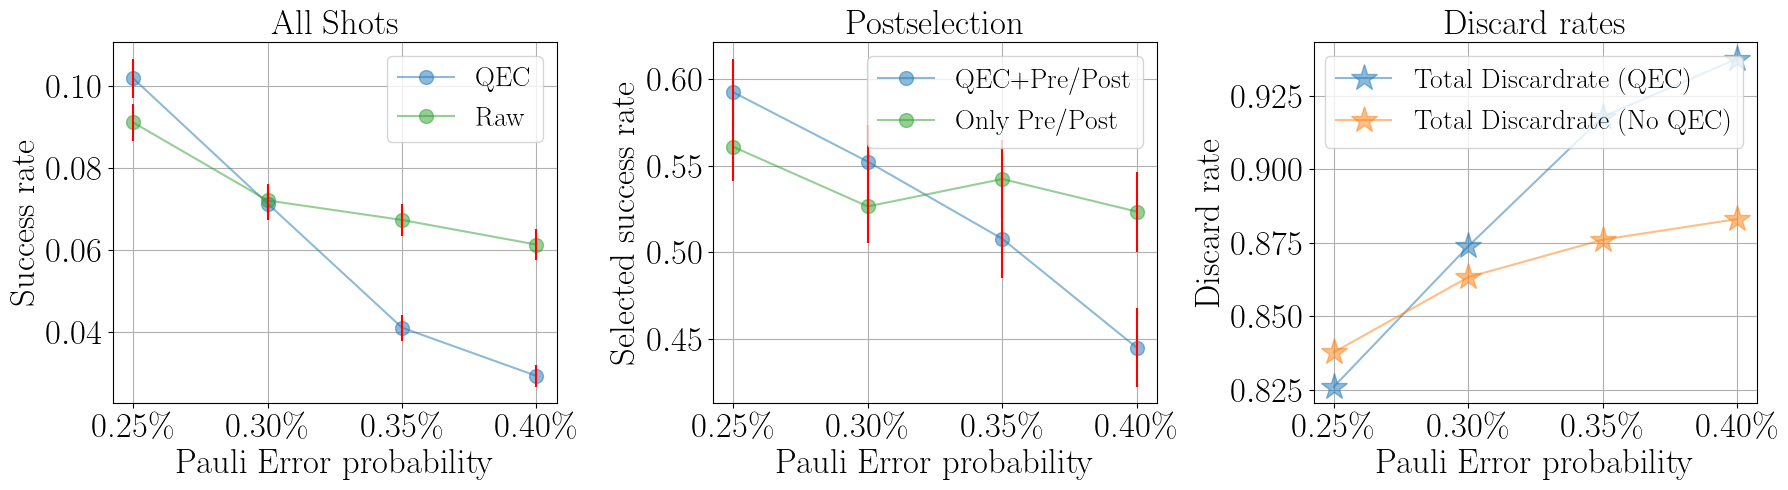

In [12]:
x,pre,post,zero,one,pre_QEC,post_QEC, zero_QEC, one_QEC = np.loadtxt("text/FTSteane_3rd_n++.txt", delimiter = ",")   #evry fourth t/tdg gate with QEC
fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))

y = []
y_no_QEC = []
for i in range(len(x)):
    y.append(zero_QEC[i])
    y_no_QEC.append(zero[i])

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    if (one[i]+zero[i]) == 0:
        y_no_QEC_PS.append(0.5)
    else:
        y_no_QEC_PS.append(zero[i]/(one[i]+zero[i]))
    if (one_QEC[i]+zero_QEC[i]) == 0:
        y_PS.append(0.5)
    else:
        y_PS.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]))

y_pre = []
for i in range(len(x)):
    y_pre.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]+post_QEC[i]))

err1 = [np.sqrt((i-i**2)/4000) for i in y]
err2 = [np.sqrt((i-i**2)/4000) for i in y_no_QEC]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(4000*(1-post[y_PS.index(i)]-pre_QEC[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(4000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))

ax1.plot(x,y, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err1, ecolor="red", linestyle="")

ax1.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_no_QEC, yerr=err2, ecolor="red", linestyle="")


ax2.plot(x,y_PS, label="QEC+Pre/Post", marker = ".",markersize = 20,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")

ax2.plot(x,y_no_QEC_PS, label="Only Pre/Post", marker = ".",markersize = 20, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")


# ax3.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_pre, label="QEC+Pre", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_PS, label="QEC+Pre+Post", marker = ".",markersize = 15, alpha = 0.5)

#ax4.plot(x, pre, label="Preselection (No QEC)", marker = ".",markersize = 15, alpha = 0.5)

# ax4.plot(x, post_QEC, label="Postselection (QEC)", marker = "s",markersize = 7, alpha = 0.5)
# ax4.plot(x, post, label="Postselection (No QEC)", marker = "s",markersize = 7, alpha = 0.5)

ax4.plot(x, post_QEC+pre, label="Total Discardrate (QEC)", marker = "*",markersize = 20, alpha = 0.5)
ax4.plot(x, post+pre, label="Total Discardrate (No QEC)", marker = "*",markersize = 20, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("All Shots", fontsize=25) #ax1.set_title("3. Iter., Steane, 8k Shots, 6xQEC", fontsize=25)
ax2.set_title("Postselection", fontsize=25)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Discard rates", fontsize=25)
ax1.set_xlabel("Pauli Error probability", fontsize=25)
ax2.set_xlabel("Pauli Error probability", fontsize=25)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=25)
ax1.set_ylabel("Success rate", fontsize=25)
ax2.set_ylabel("Selected success rate", fontsize=25)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=25)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=20)
#fig.suptitle('iQPE on a [7,1,3] FT Steane Code (6 x FT QEC, ideal H)', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/FTSteane24.png", dpi = 200)
plt.show()

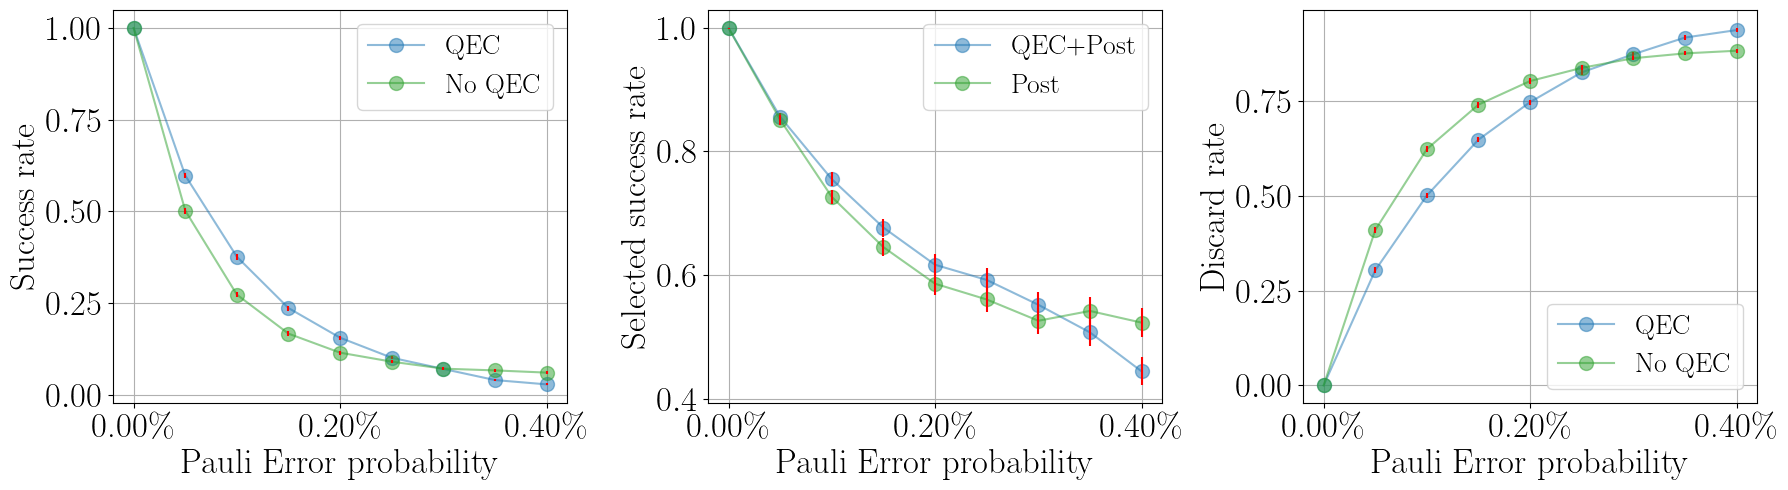

In [30]:
data1 = np.loadtxt("text/FTSteane_3rd_n+.txt", delimiter = ",")   #evry fourth t/tdg gate with QEC
data2 = np.loadtxt("text/FTSteane_3rd_n.txt", delimiter = ",")   #evry fourth t/tdg gate with QEC
data3 = np.loadtxt("text/FTSteane_3rd_n++.txt", delimiter = ",")   #evry fourth t/tdg gate with QEC

x = np.concatenate((data1[0],data2[0],data3[0]))

all = np.zeros(9)

for i in range(len(all)):
    hmm = np.concatenate((data1[i],data2[i],data3[i]))
    all = np.vstack((all,hmm))

x,pre,post,zero,one,pre_QEC,post_QEC, zero_QEC, one_QEC = all[1], all[2], all[3], all[4], all[5], all[6], all[7], all[8], all[9]

fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))

y = []
y_no_QEC = []
for i in range(len(x)):
    y.append(zero_QEC[i])
    y_no_QEC.append(zero[i])

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    if (one[i]+zero[i]) == 0:
        y_no_QEC_PS.append(0.5)
    else:
        y_no_QEC_PS.append(zero[i]/(one[i]+zero[i]))
    if (one_QEC[i]+zero_QEC[i]) == 0:
        y_PS.append(0.5)
    else:
        y_PS.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]))

y_pre = []
for i in range(len(x)):
    y_pre.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]+post_QEC[i]))

err1 = [np.sqrt((i-i**2)/4000) for i in y]
err2 = [np.sqrt((i-i**2)/4000) for i in y_no_QEC]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(4000*(1-post[y_PS.index(i)]-pre_QEC[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(4000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))


err5 = [np.sqrt((i-i**2)/4000) for i in post]
err6 = [np.sqrt((i-i**2)/4000) for i in post_QEC]

ax1.plot(x,y, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err1, ecolor="red", linestyle="")

ax1.plot(x,y_no_QEC, label="No QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_no_QEC, yerr=err2, ecolor="red", linestyle="")


ax2.plot(x,y_PS, label="QEC+Post", marker = ".",markersize = 20,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")

ax2.plot(x,y_no_QEC_PS, label="Post", marker = ".",markersize = 20, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")


# ax3.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_pre, label="QEC+Pre", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_PS, label="QEC+Pre+Post", marker = ".",markersize = 15, alpha = 0.5)

#ax4.plot(x, pre, label="Preselection (No QEC)", marker = ".",markersize = 15, alpha = 0.5)

# ax4.plot(x, post_QEC, label="Postselection (QEC)", marker = "s",markersize = 7, alpha = 0.5)
# ax4.plot(x, post, label="Postselection (No QEC)", marker = "s",markersize = 7, alpha = 0.5)

ax4.plot(x, post_QEC+pre, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax4.errorbar(x, post_QEC+pre, yerr=err5, ecolor="red", linestyle="")
ax4.plot(x, post+pre, label="No QEC", marker = ".",markersize = 20, color="#2ca02c", alpha = 0.5)
ax4.errorbar(x, post+pre, yerr=err6, ecolor="red", linestyle="")


#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
# ax1.set_title("All Shots", fontsize=25) #ax1.set_title("3. Iter., Steane, 8k Shots, 6xQEC", fontsize=25)
# ax2.set_title("Postselection", fontsize=25)
# ax4.set_title("Discard rates", fontsize=25)

ax1.set_xlabel("Pauli Error probability", fontsize=25)
ax2.set_xlabel("Pauli Error probability", fontsize=25)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=25)
ax1.set_ylabel("Success rate", fontsize=25)
ax2.set_ylabel("Selected success rate", fontsize=25)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=25)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=20)
#fig.suptitle('iQPE on a [7,1,3] FT Steane Code (6 x FT QEC, ideal H)', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/FTSteane25.png", dpi = 200)
plt.show()

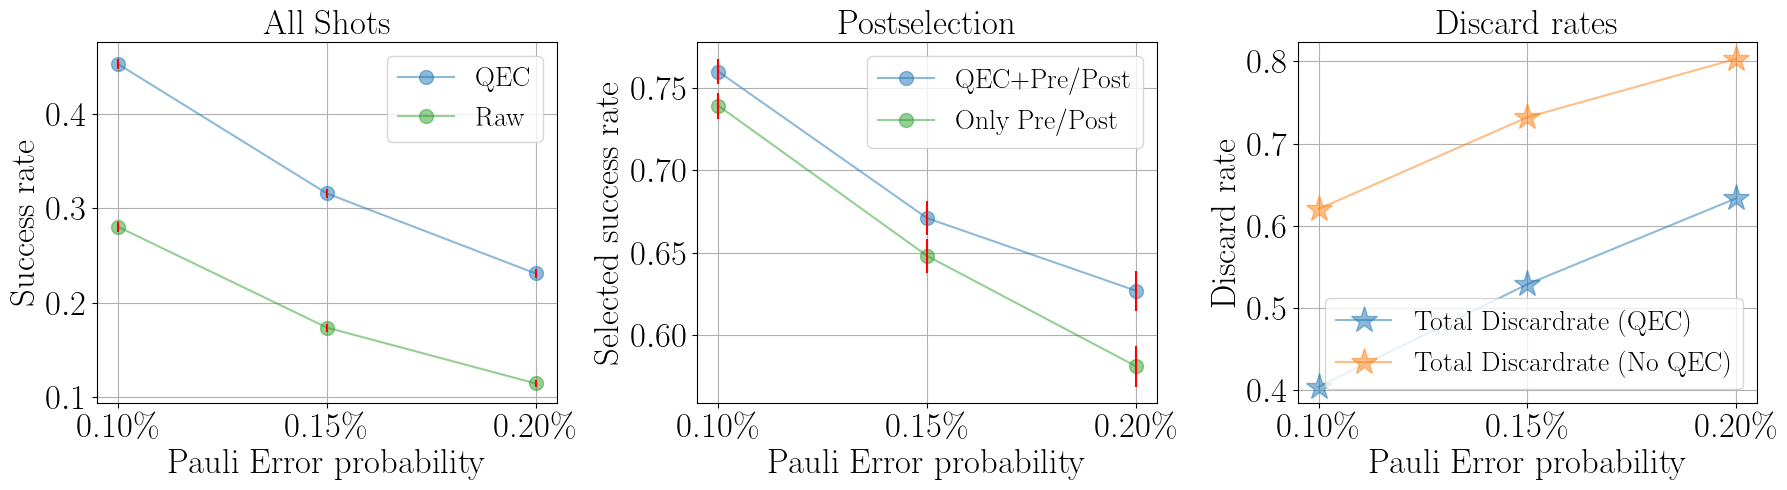

In [ ]:
x,pre,post,zero,one,pre_QEC,post_QEC, zero_QEC, one_QEC = np.loadtxt("text/FTSteane_3rd_p.txt", delimiter = ",")   #qec after every t/tdg
fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))

y = []
y_no_QEC = []
for i in range(len(x)):
    y.append(zero_QEC[i])
    y_no_QEC.append(zero[i])

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    if (one[i]+zero[i]) == 0:
        y_no_QEC_PS.append(0.5)
    else:
        y_no_QEC_PS.append(zero[i]/(one[i]+zero[i]))
    if (one_QEC[i]+zero_QEC[i]) == 0:
        y_PS.append(0.5)
    else:
        y_PS.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]))

y_pre = []
for i in range(len(x)):
    y_pre.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]+post_QEC[i]))

err1 = [np.sqrt((i-i**2)/8000) for i in y]
err2 = [np.sqrt((i-i**2)/8000) for i in y_no_QEC]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(8000*(1-post[y_PS.index(i)]-pre_QEC[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(8000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))

ax1.plot(x,y, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err1, ecolor="red", linestyle="")

ax1.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_no_QEC, yerr=err2, ecolor="red", linestyle="")


ax2.plot(x,y_PS, label="QEC+Pre/Post", marker = ".",markersize = 20,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")

ax2.plot(x,y_no_QEC_PS, label="Only Pre/Post", marker = ".",markersize = 20, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")


# ax3.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_pre, label="QEC+Pre", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_PS, label="QEC+Pre+Post", marker = ".",markersize = 15, alpha = 0.5)

#ax4.plot(x, pre, label="Preselection (No QEC)", marker = ".",markersize = 15, alpha = 0.5)

# ax4.plot(x, post_QEC, label="Postselection (QEC)", marker = "s",markersize = 7, alpha = 0.5)
# ax4.plot(x, post, label="Postselection (No QEC)", marker = "s",markersize = 7, alpha = 0.5)

ax4.plot(x, post_QEC+pre, label="Total Discardrate (QEC)", marker = "*",markersize = 20, alpha = 0.5)
ax4.plot(x, post+pre, label="Total Discardrate (No QEC)", marker = "*",markersize = 20, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("All Shots", fontsize=25) #ax1.set_title("3. Iter., Steane, 8k Shots, 6xQEC", fontsize=25)
ax2.set_title("Postselection", fontsize=25)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Discard rates", fontsize=25)
ax1.set_xlabel("Pauli Error probability", fontsize=25)
ax2.set_xlabel("Pauli Error probability", fontsize=25)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=25)
ax1.set_ylabel("Success rate", fontsize=25)
ax2.set_ylabel("Selected success rate", fontsize=25)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=25)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=20)
#fig.suptitle('iQPE on a [7,1,3] FT Steane Code (6 x FT QEC, ideal H)', fontsize=20)
plt.tight_layout()
#plt.savefig("Figures/FTSteane24.png", dpi = 200)
plt.show()

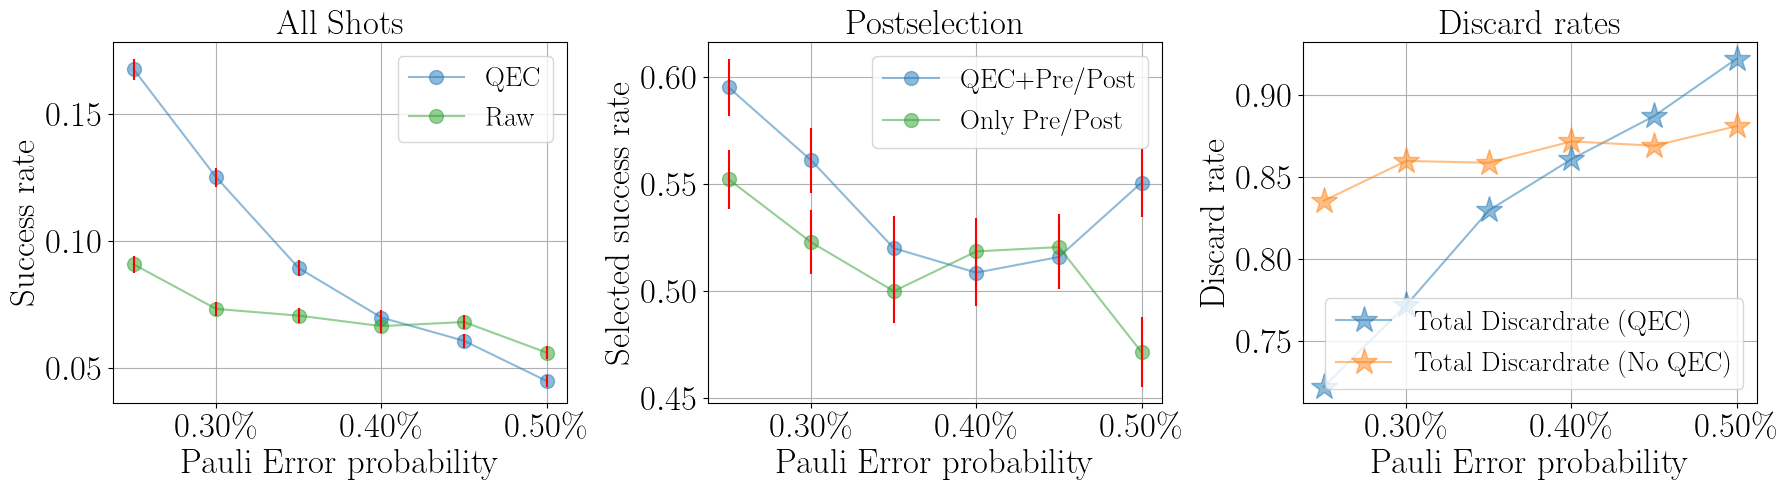

In [ ]:
x,pre,post,zero,one,pre_QEC,post_QEC, zero_QEC, one_QEC = np.loadtxt("text/FTSteane_3rd_p+.txt", delimiter = ",")   #qec after every t/tdg
fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))

y = []
y_no_QEC = []
for i in range(len(x)):
    y.append(zero_QEC[i])
    y_no_QEC.append(zero[i])

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    if (one[i]+zero[i]) == 0:
        y_no_QEC_PS.append(0.5)
    else:
        y_no_QEC_PS.append(zero[i]/(one[i]+zero[i]))
    if (one_QEC[i]+zero_QEC[i]) == 0:
        y_PS.append(0.5)
    else:
        y_PS.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]))

y_pre = []
for i in range(len(x)):
    y_pre.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]+post_QEC[i]))

err1 = [np.sqrt((i-i**2)/8000) for i in y]
err2 = [np.sqrt((i-i**2)/8000) for i in y_no_QEC]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(8000*(1-post[y_PS.index(i)]-pre_QEC[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(8000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))

ax1.plot(x,y, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err1, ecolor="red", linestyle="")

ax1.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_no_QEC, yerr=err2, ecolor="red", linestyle="")


ax2.plot(x,y_PS, label="QEC+Pre/Post", marker = ".",markersize = 20,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")

ax2.plot(x,y_no_QEC_PS, label="Only Pre/Post", marker = ".",markersize = 20, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")


# ax3.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_pre, label="QEC+Pre", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_PS, label="QEC+Pre+Post", marker = ".",markersize = 15, alpha = 0.5)

#ax4.plot(x, pre, label="Preselection (No QEC)", marker = ".",markersize = 15, alpha = 0.5)

# ax4.plot(x, post_QEC, label="Postselection (QEC)", marker = "s",markersize = 7, alpha = 0.5)
# ax4.plot(x, post, label="Postselection (No QEC)", marker = "s",markersize = 7, alpha = 0.5)

ax4.plot(x, post_QEC+pre, label="Total Discardrate (QEC)", marker = "*",markersize = 20, alpha = 0.5)
ax4.plot(x, post+pre, label="Total Discardrate (No QEC)", marker = "*",markersize = 20, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("All Shots", fontsize=25) #ax1.set_title("3. Iter., Steane, 8k Shots, 6xQEC", fontsize=25)
ax2.set_title("Postselection", fontsize=25)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Discard rates", fontsize=25)
ax1.set_xlabel("Pauli Error probability", fontsize=25)
ax2.set_xlabel("Pauli Error probability", fontsize=25)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=25)
ax1.set_ylabel("Success rate", fontsize=25)
ax2.set_ylabel("Selected success rate", fontsize=25)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=25)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=20)
#fig.suptitle('iQPE on a [7,1,3] FT Steane Code (6 x FT QEC, ideal H)', fontsize=20)
plt.tight_layout()
#plt.savefig("Figures/FTSteane24.png", dpi = 200)
plt.show()

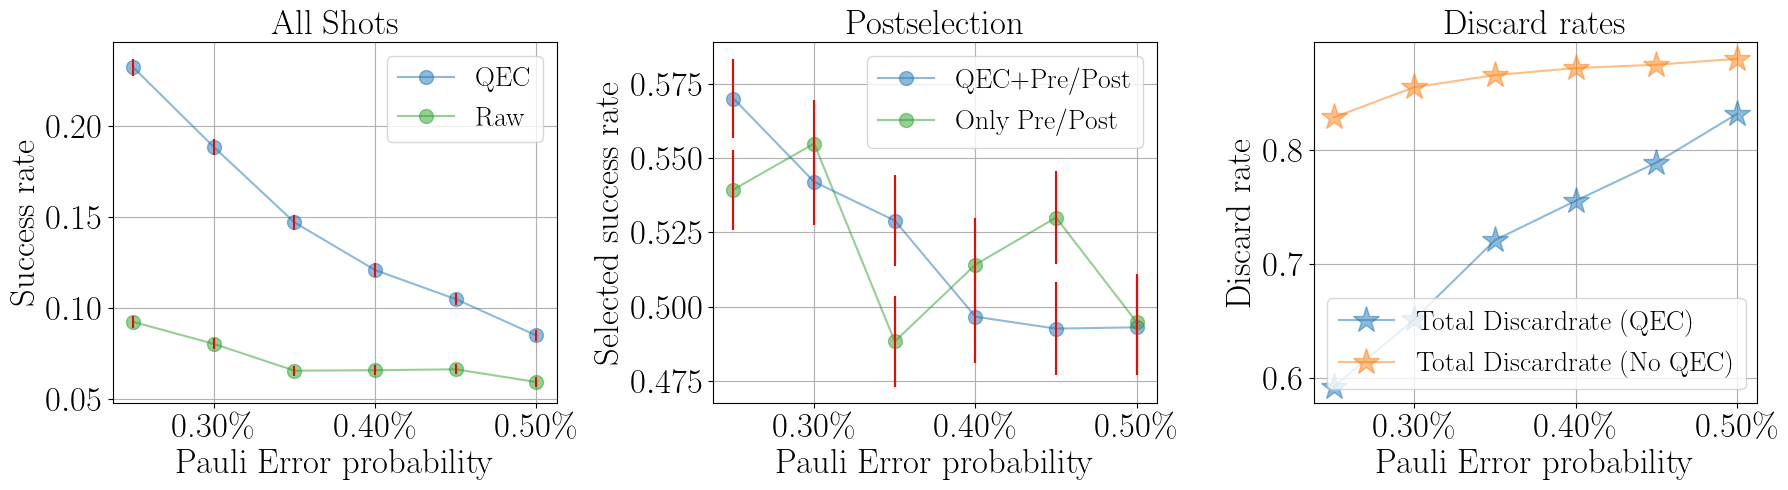

In [ ]:
x,pre,post,zero,one,pre_QEC,post_QEC, zero_QEC, one_QEC = np.loadtxt("text/FTSteane_3rd_q.txt", delimiter = ",")   #QEC after every second t/tdg gate
fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))

y = []
y_no_QEC = []
for i in range(len(x)):
    y.append(zero_QEC[i])
    y_no_QEC.append(zero[i])

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    if (one[i]+zero[i]) == 0:
        y_no_QEC_PS.append(0.5)
    else:
        y_no_QEC_PS.append(zero[i]/(one[i]+zero[i]))
    if (one_QEC[i]+zero_QEC[i]) == 0:
        y_PS.append(0.5)
    else:
        y_PS.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]))

y_pre = []
for i in range(len(x)):
    y_pre.append(zero_QEC[i]/(one_QEC[i]+zero_QEC[i]+post_QEC[i]))

err1 = [np.sqrt((i-i**2)/8000) for i in y]
err2 = [np.sqrt((i-i**2)/8000) for i in y_no_QEC]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(8000*(1-post[y_PS.index(i)]-pre_QEC[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(8000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))

ax1.plot(x,y, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err1, ecolor="red", linestyle="")

ax1.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_no_QEC, yerr=err2, ecolor="red", linestyle="")


ax2.plot(x,y_PS, label="QEC+Pre/Post", marker = ".",markersize = 20,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")

ax2.plot(x,y_no_QEC_PS, label="Only Pre/Post", marker = ".",markersize = 20, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")


# ax3.plot(x,y, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_no_QEC, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_pre, label="QEC+Pre", marker = ".",markersize = 15, alpha = 0.5)
# ax3.plot(x,y_PS, label="QEC+Pre+Post", marker = ".",markersize = 15, alpha = 0.5)

#ax4.plot(x, pre, label="Preselection (No QEC)", marker = ".",markersize = 15, alpha = 0.5)

# ax4.plot(x, post_QEC, label="Postselection (QEC)", marker = "s",markersize = 7, alpha = 0.5)
# ax4.plot(x, post, label="Postselection (No QEC)", marker = "s",markersize = 7, alpha = 0.5)

ax4.plot(x, post_QEC+pre, label="Total Discardrate (QEC)", marker = "*",markersize = 20, alpha = 0.5)
ax4.plot(x, post+pre, label="Total Discardrate (No QEC)", marker = "*",markersize = 20, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("All Shots", fontsize=25) #ax1.set_title("3. Iter., Steane, 8k Shots, 6xQEC", fontsize=25)
ax2.set_title("Postselection", fontsize=25)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Discard rates", fontsize=25)
ax1.set_xlabel("Pauli Error probability", fontsize=25)
ax2.set_xlabel("Pauli Error probability", fontsize=25)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=25)
ax1.set_ylabel("Success rate", fontsize=25)
ax2.set_ylabel("Selected success rate", fontsize=25)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=25)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=20)
#fig.suptitle('iQPE on a [7,1,3] FT Steane Code (6 x FT QEC, ideal H)', fontsize=20)
plt.tight_layout()
#plt.savefig("Figures/FTSteane24.png", dpi = 200)
plt.show()

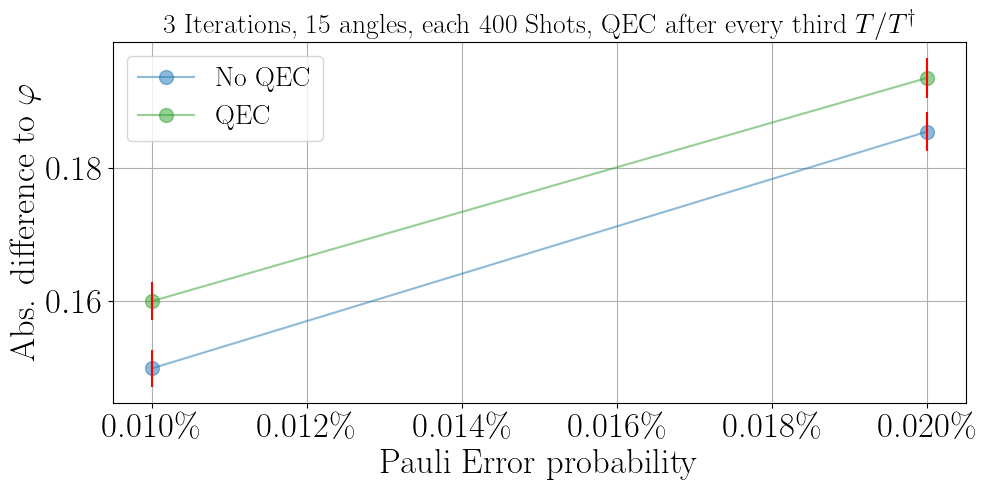

In [3]:
x, y, y_qec, err, err_qec = np.loadtxt("text/SteaneFinal_b.txt", delimiter = ",")         

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))

err = [i/((400)**0.5) for i in err]
err_qec = [i/((400)**0.5)for i in err_qec]


ax1.plot(x,y, label="No QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err, ecolor="red", linestyle="")

ax1.plot(x,y_qec, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_qec, yerr=err_qec, ecolor="red", linestyle="")

ax1.set_title(r"3 Iterations, 15 angles, each 400 Shots, QEC after every third $T/T^\dagger$", fontsize=20)

ax1.set_xlabel("Pauli Error probability", fontsize=25)

ax1.set_ylabel(r"Abs. difference to $\varphi$", fontsize=25)

ax1.tick_params(axis='both', which='major', labelsize=25)

ax1.grid()
ax1.legend(fontsize=20)

#fig.suptitle('Three iterations iQPE on a [12,2,4] Carbon Code', fontsize=20)
plt.tight_layout()
# plt.savefig("Figures/SteaneFinal1.png", dpi = 200)
plt.show()

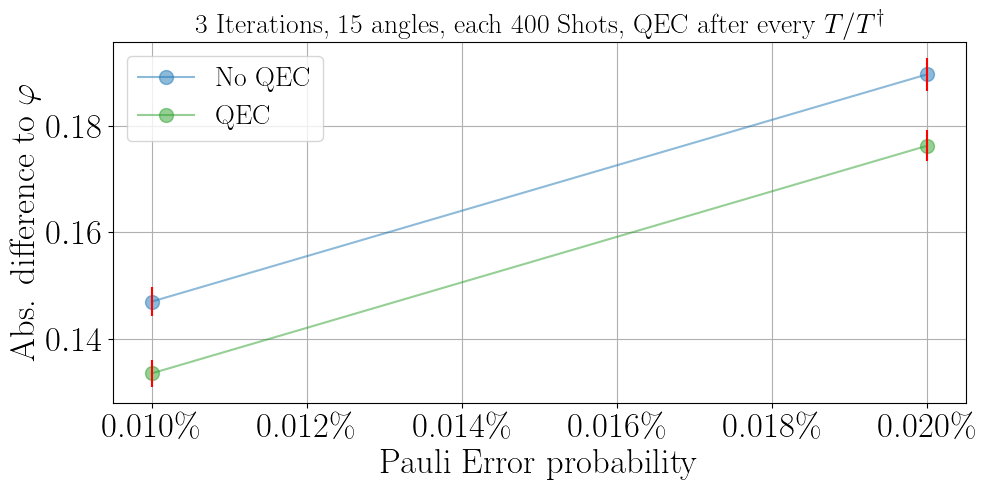

In [23]:
x, y, y_qec, err, err_qec = np.loadtxt("text/SteaneFinal_a.txt", delimiter = ",")         

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))

err = [i/((400)**0.5) for i in err]
err_qec = [i/((400)**0.5)for i in err_qec]


ax1.plot(x,y, label="No QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err, ecolor="red", linestyle="")

ax1.plot(x,y_qec, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_qec, yerr=err_qec, ecolor="red", linestyle="")

ax1.set_title(r"3 Iterations, 15 angles, each 400 Shots, QEC after every $T/T^\dagger$", fontsize=20)

ax1.set_xlabel("Pauli Error probability", fontsize=25)

ax1.set_ylabel(r"Abs. difference to $\varphi$", fontsize=25)

ax1.tick_params(axis='both', which='major', labelsize=25)

ax1.grid()
ax1.legend(fontsize=20)

#fig.suptitle('Three iterations iQPE on a [12,2,4] Carbon Code', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/SteaneFinal1.png", dpi = 200)
plt.show()

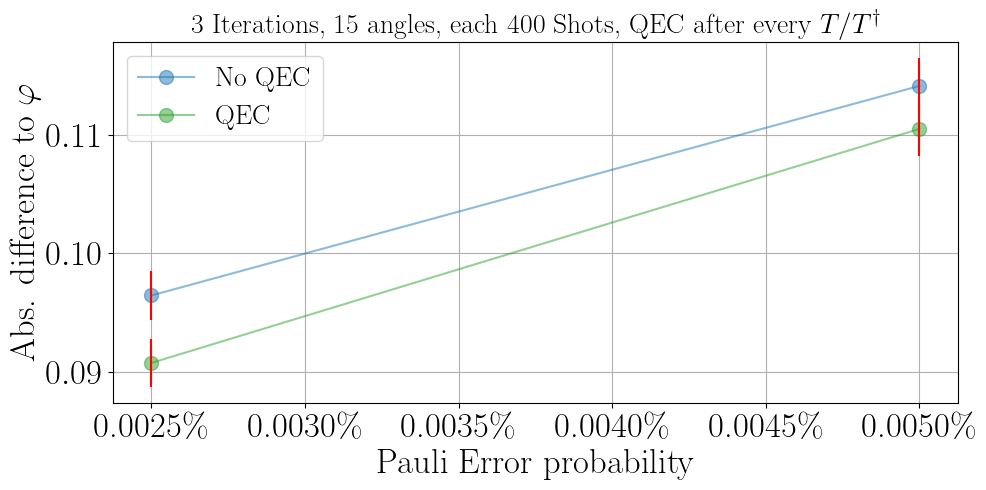

In [8]:
x, y, y_qec, err, err_qec = np.loadtxt("text/SteaneFinal_a+.txt", delimiter = ",")         

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 4))

err = [i/((400)**0.5) for i in err]
err_qec = [i/((400)**0.5)for i in err_qec]


ax1.plot(x,y, label="No QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err, ecolor="red", linestyle="")

ax1.plot(x,y_qec, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_qec, yerr=err_qec, ecolor="red", linestyle="")

ax1.set_title(r"3 Iterations, 15 angles, each 400 Shots, QEC after every $T/T^\dagger$", fontsize=20)

ax1.set_xlabel("Pauli Error probability", fontsize=25)

ax1.set_ylabel(r"Abs. difference to $\varphi$", fontsize=25)

ax1.tick_params(axis='both', which='major', labelsize=25)

ax1.grid()
ax1.legend(fontsize=20)

#fig.suptitle('Three iterations iQPE on a [12,2,4] Carbon Code', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/SteaneFinal2.png", dpi = 200)
plt.show()

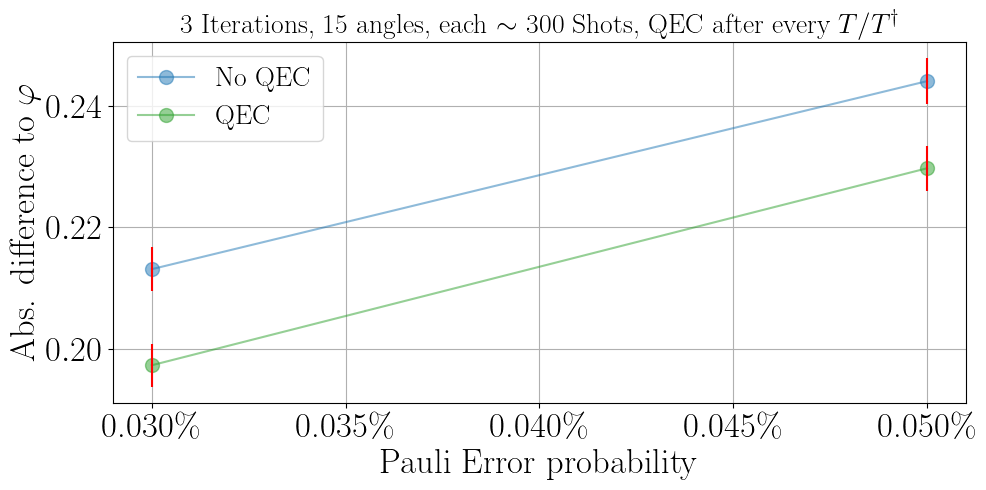

In [3]:
x, y, y_qec, err, err_qec = np.loadtxt("text/SteaneFinal_a++new.txt", delimiter = ",")         

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))

err = [i/((400-113)**0.5) for i in err]
err_qec = [i/((400-113)**0.5)for i in err_qec]


ax1.plot(x,y, label="No QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err, ecolor="red", linestyle="")

ax1.plot(x,y_qec, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_qec, yerr=err_qec, ecolor="red", linestyle="")

ax1.set_title(r"3 Iterations, 15 angles, each $\sim$ 300 Shots, QEC after every $T/T^\dagger$", fontsize=20)

ax1.set_xlabel("Pauli Error probability", fontsize=25)

ax1.set_ylabel(r"Abs. difference to $\varphi$", fontsize=25)

ax1.tick_params(axis='both', which='major', labelsize=25)

ax1.grid()
ax1.legend(fontsize=20)

#fig.suptitle('Three iterations iQPE on a [12,2,4] Carbon Code', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/SteaneFinal3.png", dpi = 200)
plt.show()

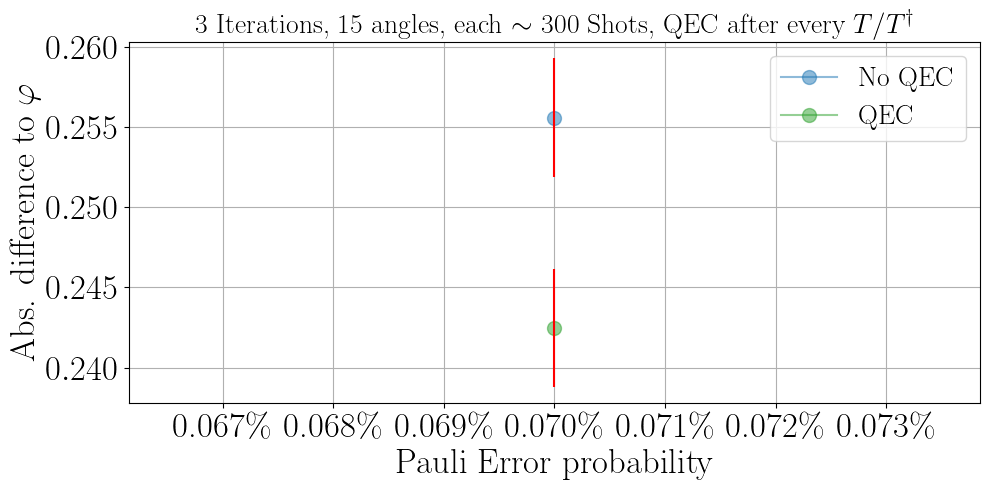

In [8]:
x, y, y_qec, err, err_qec = np.loadtxt("text/SteaneFinal_a+++.txt", delimiter = ",")         

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))

err = err/((400-113)**0.5)
err_qec = err_qec/((400-113)**0.5)


ax1.plot(x,y, label="No QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err, ecolor="red", linestyle="")

ax1.plot(x,y_qec, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_qec, yerr=err_qec, ecolor="red", linestyle="")

ax1.set_title(r"3 Iterations, 15 angles, each $\sim$ 300 Shots, QEC after every $T/T^\dagger$", fontsize=20)

ax1.set_xlabel("Pauli Error probability", fontsize=25)

ax1.set_ylabel(r"Abs. difference to $\varphi$", fontsize=25)

ax1.tick_params(axis='both', which='major', labelsize=25)

ax1.grid()
ax1.legend(fontsize=20)

#fig.suptitle('Three iterations iQPE on a [12,2,4] Carbon Code', fontsize=20)
plt.tight_layout()
#plt.savefig("Figures/SteaneFinal3.png", dpi = 200)
plt.show()

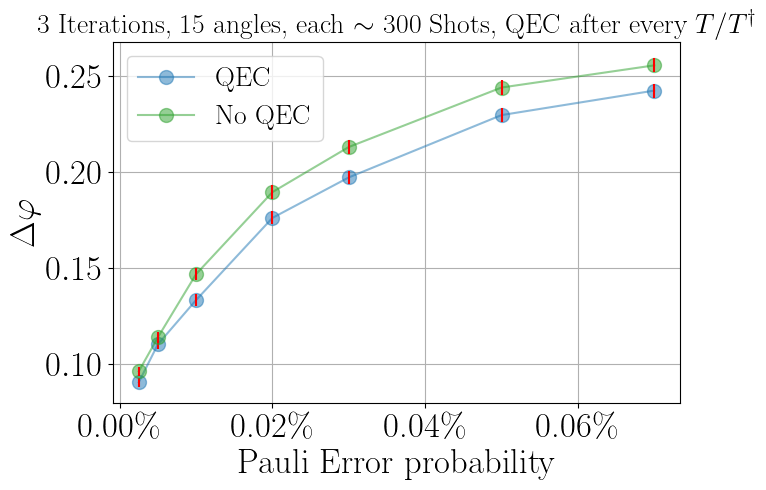

In [ ]:
x1, y1, y_qec1, err1, err_qec1 = np.loadtxt("text/SteaneFinal_a+.txt", delimiter = ",")  
x2, y2, y_qec2, err2, err_qec2 = np.loadtxt("text/SteaneFinal_a.txt", delimiter = ",")  
x3, y3, y_qec3, err3, err_qec3 = np.loadtxt("text/SteaneFinal_a++new.txt", delimiter = ",")  
x4, y4, y_qec4, err4, err_qec4 = np.loadtxt("text/SteaneFinal_a+++.txt", delimiter = ",")  

x1, y1, y_qec1, err1, err_qec1 = list(x1), list(y1), list(y_qec1), list(err1), list(err_qec1)
x2, y2, y_qec2, err2, err_qec2 = list(x2), list(y2), list(y_qec2), list(err2), list(err_qec2)
x3, y3, y_qec3, err3, err_qec3 = list(x3), list(y3), list(y_qec3), list(err3), list(err_qec3)
#x4, y4, y_qec4, err4, err_qec4 = list(x4), list(y4), list(y_qec4), list(err4), list(err_qec4)

x, y, y_qec, err, err_qec = x1+x2+x3, y1+y2+y3, y_qec1+y_qec2+y_qec3, err1+err2+err3, err_qec1+err_qec2+err_qec3

x.append(x4), y.append(y4), y_qec.append(y_qec4), err.append(err4), err_qec.append(err_qec4)

fig, ax1 = plt.subplots(figsize=(7,5))
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))

err = [i/((400-113)**0.5) for i in err]
err_qec = [i/((400-113)**0.5)for i in err_qec]

ax1.plot(x,y_qec, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_qec, yerr=err_qec, ecolor="red", linestyle="")

ax1.plot(x,y, label="No QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err, ecolor="red", linestyle="")


ax1.set_title(r"3 Iterations, 15 angles, each $\sim$ 300 Shots, QEC after every $T/T^\dagger$", fontsize=20)

ax1.set_xlabel("Pauli Error probability", fontsize=25)

ax1.set_ylabel(r"$\Delta \varphi$", fontsize=25)

ax1.tick_params(axis='both', which='major', labelsize=25)

ax1.grid()
ax1.legend(fontsize=20)

#fig.suptitle('Three iterations iQPE on a [12,2,4] Carbon Code', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/SteaneFinal4.png", dpi = 200)
plt.show()

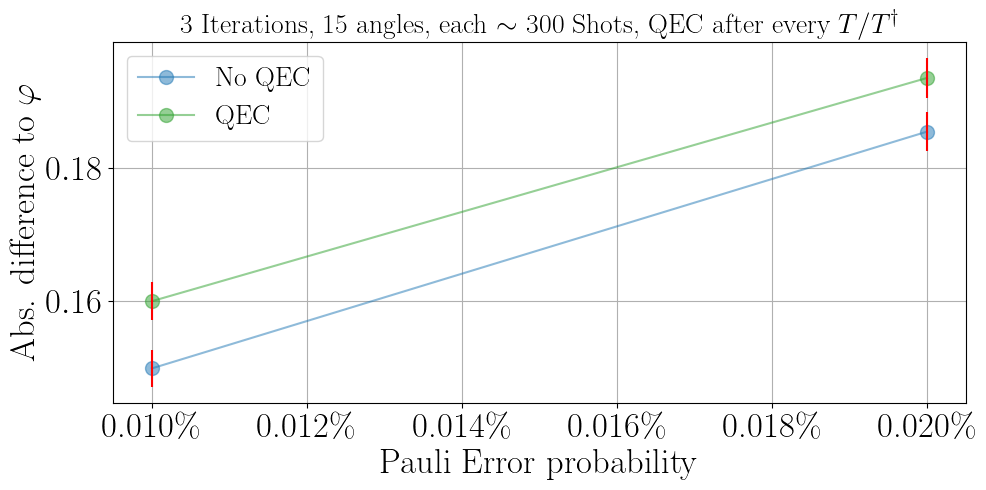

In [3]:
x, y, y_qec, err, err_qec = np.loadtxt("text/SteaneFinal_b.txt", delimiter = ",")          #QEC after every third T/Tdg

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 3))

err = [i/((400)**0.5) for i in err]
err_qec = [i/((400)**0.5)for i in err_qec]


ax1.plot(x,y, label="No QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err, ecolor="red", linestyle="")

ax1.plot(x,y_qec, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_qec, yerr=err_qec, ecolor="red", linestyle="")

ax1.set_title(r"3 Iterations, 15 angles, each $\sim$ 300 Shots, QEC after every $T/T^\dagger$", fontsize=20)

ax1.set_xlabel("Pauli Error probability", fontsize=25)

ax1.set_ylabel(r"Abs. difference to $\varphi$", fontsize=25)

ax1.tick_params(axis='both', which='major', labelsize=25)

ax1.grid()
ax1.legend(fontsize=20)

#fig.suptitle('Three iterations iQPE on a [12,2,4] Carbon Code', fontsize=20)
plt.tight_layout()
#plt.savefig("Figures/SteaneFinal3.png", dpi = 200)
plt.show()